# Student Loan Risk with Deep Learning

In [ ]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [ ]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [ ]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

1    855
0    744
Name: credit_ranking, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [ ]:
# Define the target set y using the credit_ranking column
y=loans_df["credit_ranking"]

# Display a sample of y
y[0:5]

0    0
1    0
2    0
3    1
4    0
Name: credit_ranking, dtype: int64

In [ ]:
# Define features set X by selecting all columns but credit_ranking
X=loans_df.drop(columns=["credit_ranking"])

# Review the features DataFrame
X.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [ ]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [ ]:
# Create a StandardScaler instance
scaler=StandardScaler()

# Fit the scaler to the features training dataset
scaler.fit(X_train)

# Generate Prediction
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [ ]:
# Define the the number of inputs (features) to the model
no_inputs=len(X.columns)

# Review the number of features
no_inputs

11

In [ ]:
# Define the number of hidden nodes for the first hidden layer
first_hidden=Dense(units=6, activation='relu', input_dim=no_inputs)

# Define the number of hidden nodes for the second hidden layer
second_hidden=Dense(units=3, activation='relu')

# Define the number of neurons in the output layer
output=Dense(units=1,activation='sigmoid')

In [ ]:
# Create the Sequential model instance
model=Sequential()

# Add the first hidden layer
model.add(first_hidden)

# Add the second hidden layer
model.add(second_hidden)

# Add the output layer to the model specifying the number of output neurons and activation function
model.add(output)

In [ ]:
# Display the Sequential model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [ ]:
# Compile the Sequential model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model using 50 epochs and the training data
model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
38/38 [==============================] - 4s 8ms/step - loss: 0.8311 - accuracy: 0.5563
Epoch 2/50
38/38 [==============================] - 0s 6ms/step - loss: 0.7399 - accuracy: 0.5855
Epoch 3/50
38/38 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.6214
Epoch 4/50
38/38 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6397
Epoch 5/50
38/38 [==============================] - 0s 9ms/step - loss: 0.6463 - accuracy: 0.6639
Epoch 6/50
38/38 [==============================] - 0s 6ms/step - loss: 0.6330 - accuracy: 0.6806
Epoch 7/50
38/38 [==============================] - 0s 6ms/step - loss: 0.6228 - accuracy: 0.6872
Epoch 8/50
38/38 [==============================] - 0s 8ms/step - loss: 0.6145 - accuracy: 0.6889
Epoch 9/50
38/38 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.7056
Epoch 10/50
38/38 [==============================] - 0s 6ms/step - loss: 0.6009 - accuracy: 0.7131
Epoch 11/50
38/38 [

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
results= model.evaluate(X_train_scaled, y_train)

# Display the model loss and accuracy results
print(f'Loss: {results[0]}, Accuracy: {results[1]}')

38/38 [==============================] - 0s 7ms/step - loss: 0.5126 - accuracy: 0.7615
Loss: 0.5125622749328613, Accuracy: 0.7614678740501404


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [ ]:
# Set the model's file path
file_path=Path("student_loan.keras")

# Export your model to a keras file
model.save(file_path)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [ ]:
# Set the model's file path
file_path=Path("student_loan.keras")

# Load the model to a new object
nn_imported=tf.keras.models.load_model(file_path)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [ ]:
# Make predictions with the test data
prediction=nn_imported.predict(X_test_scaled)

# Display a sample of the predictions
prediction[0:5]

13/13 [==============================] - 0s 3ms/step


array([[0.373065  ],
       [0.30756325],
       [0.76684666],
       [0.676163  ],
       [0.98227084]], dtype=float32)

In [ ]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df=pd.DataFrame(columns=["Prediction"], data=prediction)
predictions_df['Prediction']=round(predictions_df['Prediction'])
predictions_df

,Prediction
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
395,1.0
396,0.0
397,1.0
398,0.0


### Step 4: Display a classification report with the y test data and predictions

In [ ]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, predictions_df['Prediction'].values))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       188
           1       0.80      0.70      0.75       212

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**
- *Current Requested Amount*
- *Average of 3 Previous Requested Amounts*
  - Average of previously paid amounts (if exist) as a historical comparisson
- *Credit Score Average :*
  - General Idea of Capacity/Culture regarding on-time payments
- *Previous 6 months Payment History Score :*
  - General Idea of recent Capacity/Culture regarding on-time payments
- *Previous 6 months average Discretionary income*
  - How much cash has been available on average in order to make the payments
- *Finance Workshop Score*
  - Measure of Student's money handling capabilities/tendencies
- *Alumni Success*
  - How likely are the students of this institution to get jobs that will pay enough for to havecover basic needs and loan payments
- *Health scores*
  - Is the person expected to be around long enough to pay ?

**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**

- *context-based filtering*
  - The recommended data to request is expected to point to current scores as well as recent average scores.
  Unexpected events can influence a score both positively and negatively and this can mislead to a Grant or Denial result.

**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**

- *Legality of Existing Data*
  - on Feb, 2020, Senators from the [**United States Senate Commitee on Banking, Housing, and Urban Affairs**](https://www.banking.senate.gov/)
  > requested information from  six companies on their use of educational data for underwriting and how they test for compliance with fair lending laws.

   and found
   > underwriting practices that may result in violations of ECOA and Regulation B: (1) considering the school an applicant attended to determine creditworthiness; (2) considering an applicant’s major or program to determine creditworthiness.

  - The Data in this excercise does not directly consider the school, but it does consider the *Alumni Success*, also it considers the *Study Major*. The use of either of this features could be considered as a violation of **The Equal Credit Opportunity Act**.
  - More information about the actions of the Commitee regarding this matter can be found in the document titled  [Use of Educational Data to Make Credit Determinations](https://www.banking.senate.gov/imo/media/doc/Review%20-%20Use%20of%20Educational%20Data.pdf)


- *Usefullness of the Data*
  - For the model to be reliable it requires **complete** training data available. The more complex the "underwriting" process becomes, the more data needs to be used to train a reliable model

# Additional review of the values of current information as well as some graphs


In [ ]:
loans_df.columns

Index(['payment_history', 'location_parameter', 'stem_degree_score',
       'gpa_ranking', 'alumni_success', 'study_major_code',
       'time_to_completion', 'finance_workshop_score', 'cohort_ranking',
       'total_loan_score', 'financial_aid_score', 'credit_ranking'],
      dtype='object')

In [ ]:
for column in loans_df.columns:
  print('*'*5,column,'*'*5)
  print(loans_df[column].value_counts().sort_index())
  print()

***** payment_history *****
4.6     1
4.7     1
4.9     1
5.0     6
5.1     4
       ..
14.3    1
15.0    2
15.5    2
15.6    2
15.9    1
Name: payment_history, Length: 96, dtype: int64

***** location_parameter *****
0.120     3
0.160     2
0.180    10
0.190     2
0.200     3
         ..
1.180     1
1.185     1
1.240     1
1.330     2
1.580     1
Name: location_parameter, Length: 143, dtype: int64

***** stem_degree_score *****
0.00    132
0.01     33
0.02     50
0.03     30
0.04     29
       ... 
0.75      1
0.76      3
0.78      1
0.79      1
1.00      1
Name: stem_degree_score, Length: 80, dtype: int64

***** gpa_ranking *****
0.9      2
1.2      8
1.3      5
1.4     35
1.5     30
        ..
13.4     1
13.8     2
13.9     1
15.4     2
15.5     1
Name: gpa_ranking, Length: 91, dtype: int64

***** alumni_success *****
0.012    2
0.034    1
0.038    2
0.039    4
0.041    4
        ..
0.422    1
0.464    1
0.467    1
0.610    1
0.611    1
Name: alumni_success, Length: 153, dtype: int6

In [ ]:
loans_df['finance_workshop_score'].loc[loans_df['credit_ranking']==0].value_counts().sort_index()


0.99256    1
0.99258    1
0.99286    1
0.99306    1
0.99322    1
          ..
1.00180    1
1.00242    2
1.00260    1
1.00289    1
1.00315    3
Name: finance_workshop_score, Length: 264, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def get_X_ticks(no_of_labels,column):
  x_label=[]
  min=loans_df[column].min()
  difference=loans_df[column].max()-min
  increment=difference/no_of_labels
  for i in range(no_of_labels+1):
    x_label.append(i*increment+min)
  return x_label


## The graphs compare The Declined vs Approved loans based on the the frequency of the different scores  

### Most graphs show little variance making it hard to find a pattern, however:
- location_parameter,
- study_major_code, and
- financial_aid_score

charts do show some slight differences

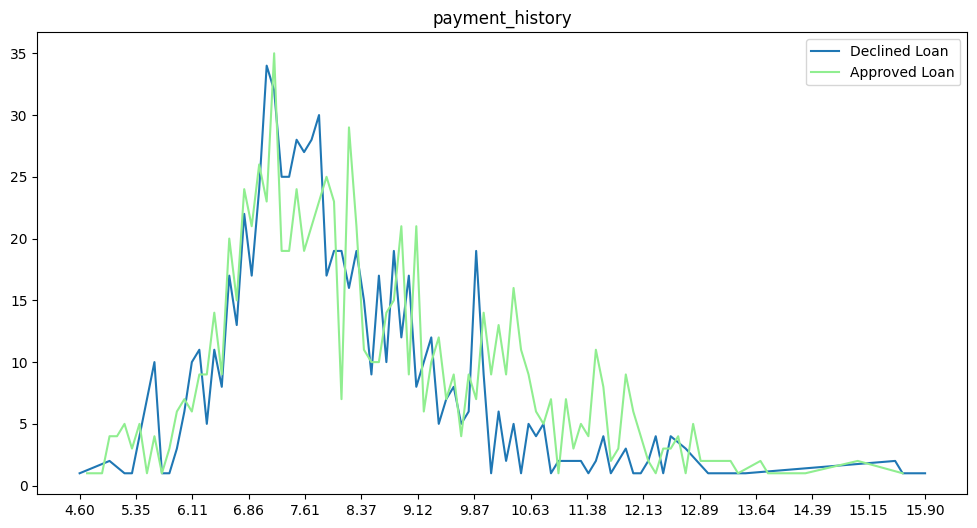

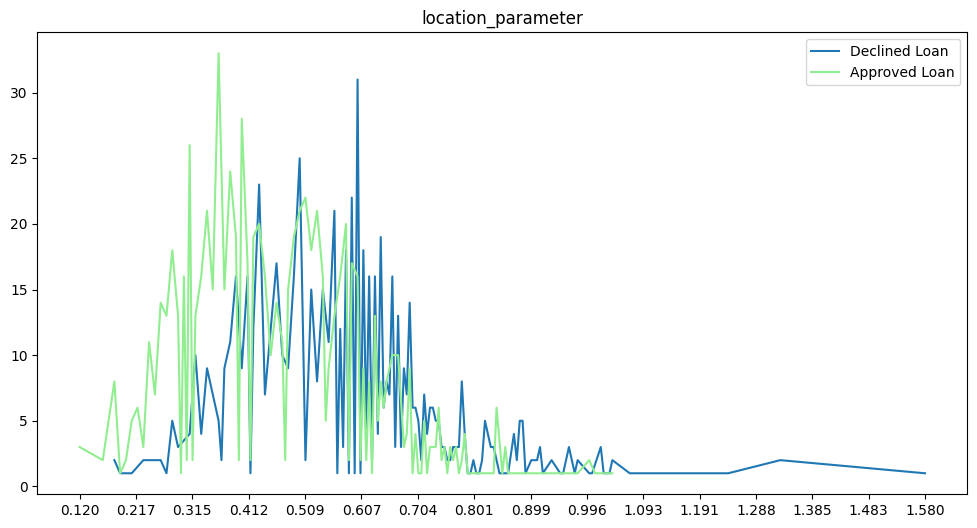

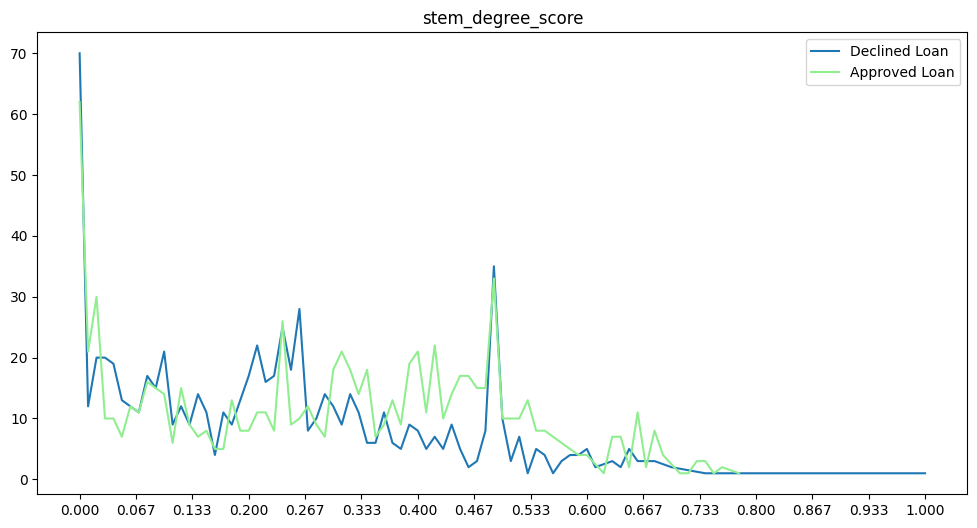

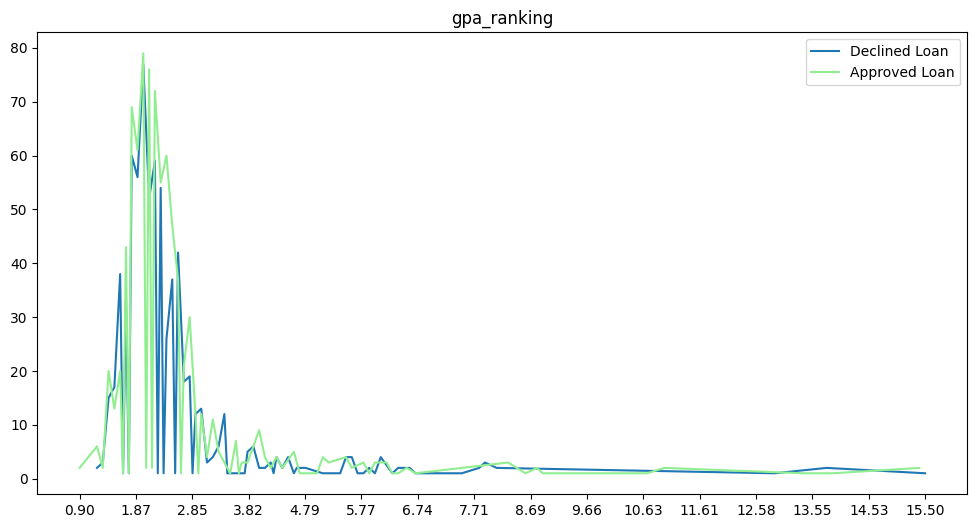

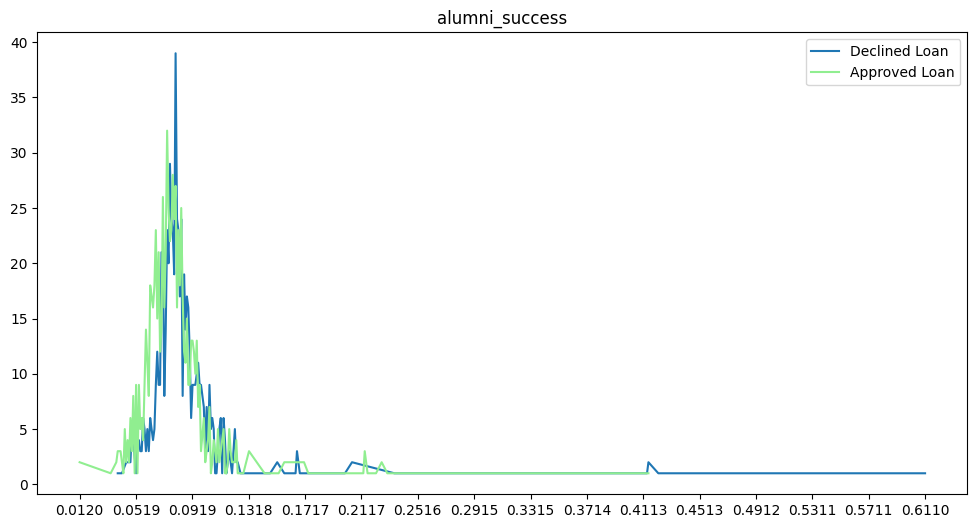

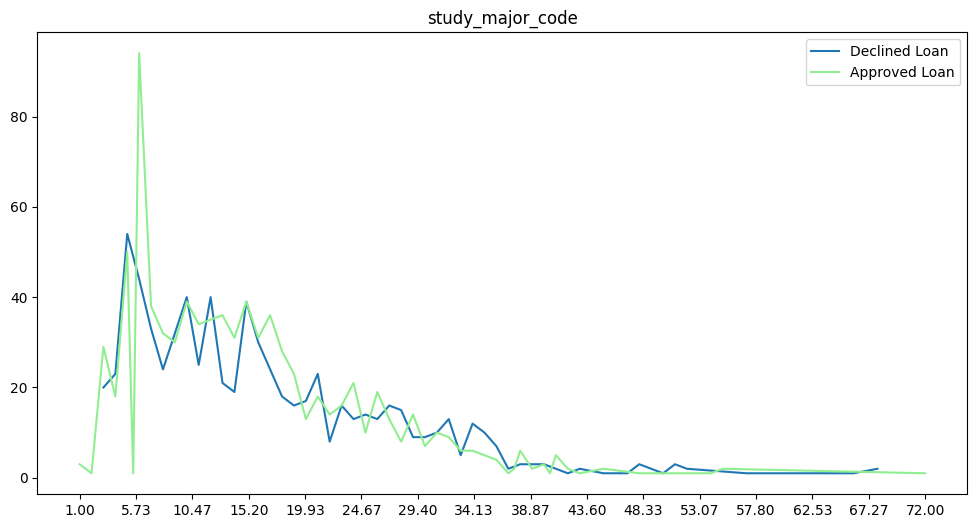

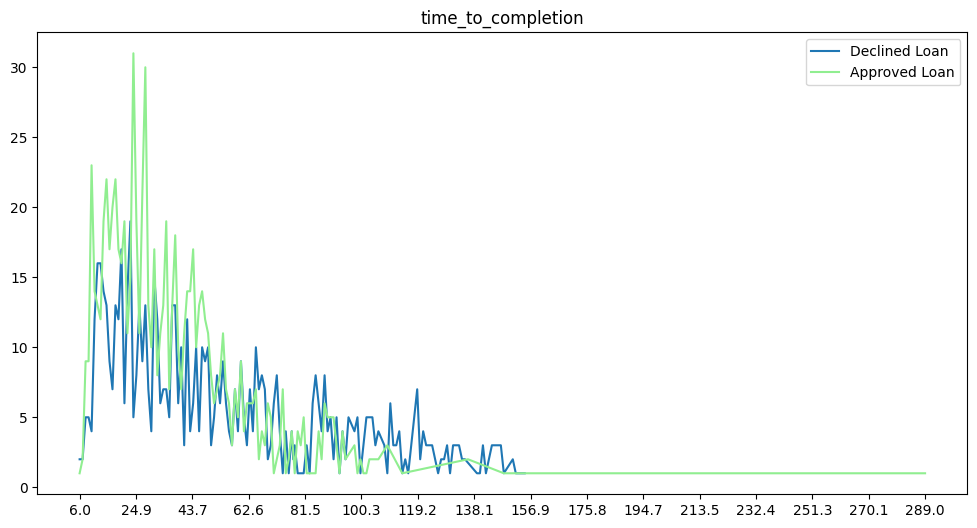

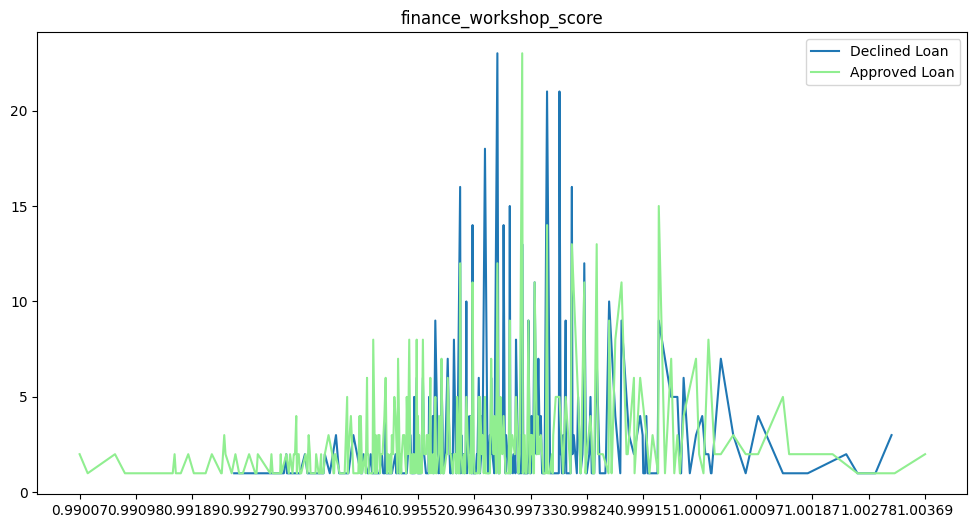

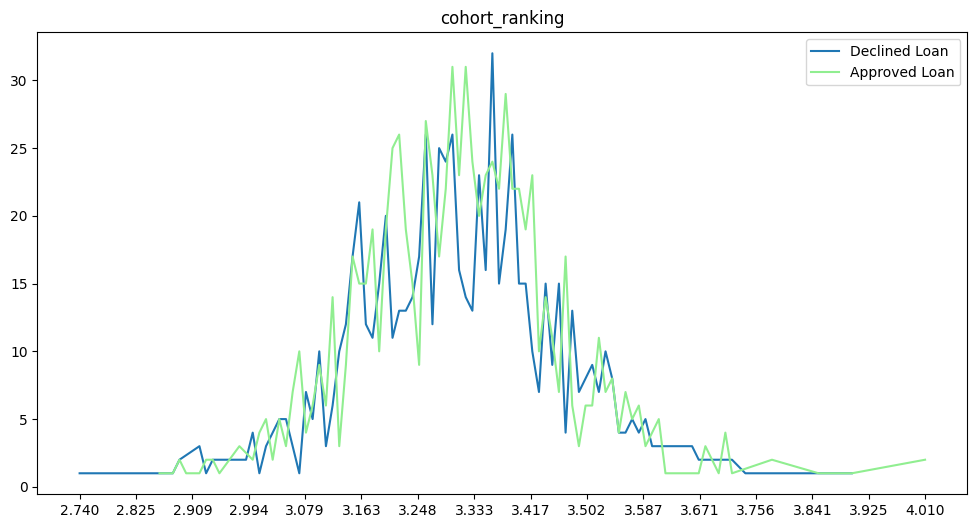

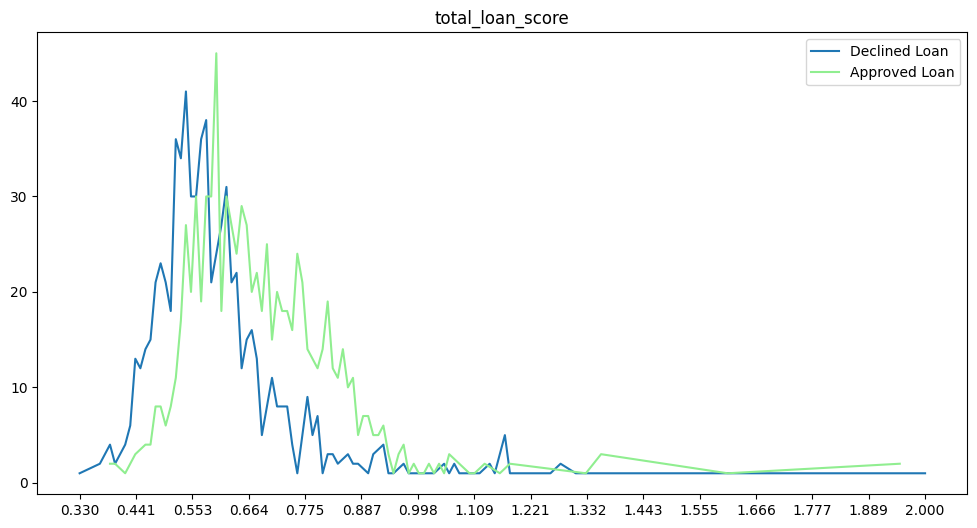

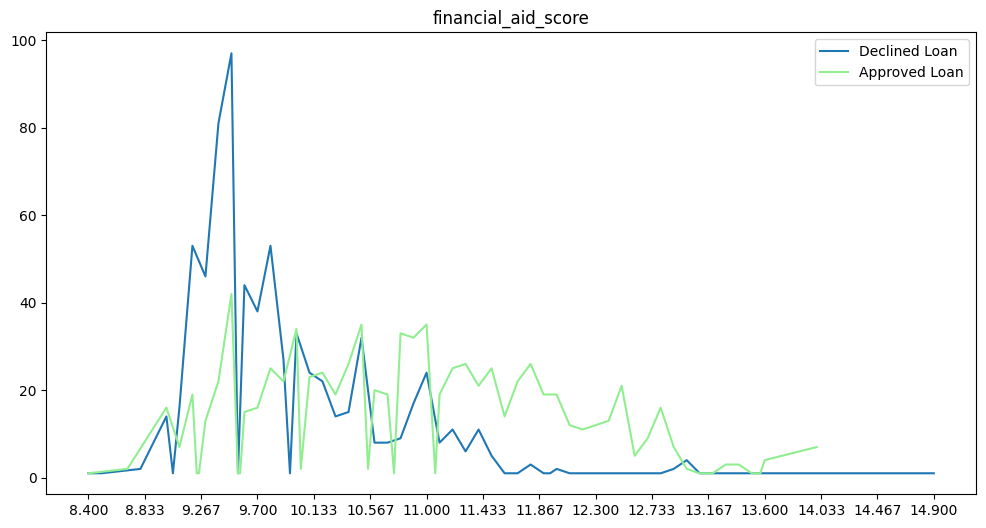

In [ ]:
for column in loans_df.columns[0:-1]:
  plt.figure(figsize=(12,6))
  plt.title(column)
  plt.xticks(get_X_ticks(15,column))
  plt.plot(loans_df[column].loc[loans_df['credit_ranking']==0].value_counts().sort_index(),\
          label='Declined Loan')
  plt.plot(loans_df[column].loc[loans_df['credit_ranking']==1].value_counts().sort_index(),\
          label='Approved Loan',color='lightgreen')
  plt.legend()
  plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

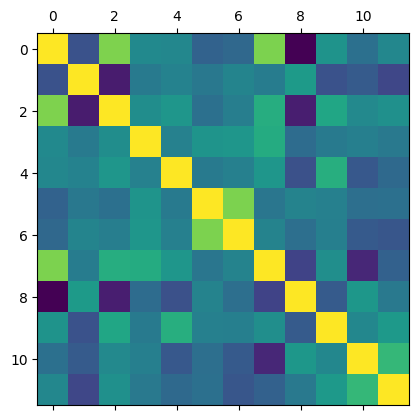

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(loans_df.corr())
plt.show

In [ ]:
loans_df.corr()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
payment_history,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
location_parameter,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
stem_degree_score,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
gpa_ranking,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
alumni_success,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
study_major_code,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
time_to_completion,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
finance_workshop_score,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
cohort_ranking,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
total_loan_score,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072
